# Experimento 1
Usando la red de spiking_jelly, es decir, DVSGesture_net probar su rendimiento en distintos datasets.


In [1]:
import torch
cuda_available = torch.cuda.is_available()
print(cuda_available)

True


In [11]:
import wandb

api = wandb.Api()

"""
username = wandb.run.entity
project = wandb.run.project
run_id = wandb.run.id
"""
run = api.run(f'tfm_datcom/Experimento1/iieckzdl')
run.summary['max_test_acc'] = 0.8772
run.update()

In [10]:
if run.config['architecture']=='DVS_SNN':
    run.config['architecture'] = 'DVSG_net'
    print('Changes done')
    run.update()


Changes done


In [14]:
import os
from sklearn.model_selection import train_test_split
end_files = '.aedat'
aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/extract/Animals/'
aedats_list = [file for file in os.listdir(aedat_dir) if file.endswith(end_files)]
sublabels_list = [file.split('_')[1] for file in aedats_list] 
train, test = train_test_split(aedats_list,stratify=sublabels_list,test_size=0.2)
print(len(train),len(test))

47 12


In [40]:
import numpy as np
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
labeldef_root = os.path.join(root,'extract','SL-Animals-DVS_gestures_definitions.csv')
labels_load = np.loadtxt(labeldef_root,dtype=str,delimiter=',',skiprows=1)
labels_defs = dict()
for label in labels_load:
    labels_defs[label[1]] = int(label[0]) - 1
list(labels_defs.keys())

['cat',
 'dog',
 'camel',
 'cow',
 'sheep',
 'goat',
 'wolf',
 'squirrel',
 'mouse',
 'dolphin',
 'shark',
 'lion',
 'monkey',
 'snake',
 'spider',
 'butterfly',
 'bird',
 'duck',
 'zebra']

In [1]:
from Laboratory import loading_data
root_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset'
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'

data,_,_ = loading_data(root_dailyactions,tr_tst_split=False)

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [6]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Animals_Dataset/events_np/train/butterfly/user01_indoor_0.npz')

In [111]:
np.array(pyx)[posic]

array([[ 0,  0,  1],
       [ 0,  1,  2],
       [ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  8, 23],
       [ 1,  9,  2]])

0 0 1 1
0 1 2 0
1 1 2 3
1 3 4 4
1 8 23 7
1 9 2 8


In [112]:
for p,y,x in uniq_values:
    print(p,y,x)

0 0 1
0 1 2
1 1 2
1 3 4
1 8 23
1 9 2


In [20]:
import numpy as np
x = np.array([2,1,4,2,4,12,2,12,2])
y = np.array([1,0,3,1,3,8,9,8,9])
p = np.array([0,0,1,1,1,1,1,1,1])
print('Tamaño: ',len(x))
t = np.array([1,3,8,12,24,36,40,45,50])
#pyx = [(p_,y_,x_) for x_,y_,p_ in zip(x,y,p)]
#print('Array de valores xy: ',xy)
#print(np.unique(xy,axis=0))
#uniq_values, posic_inverted = np.unique(pyx[::-1],axis=0,return_index=True)
uniq_values, posic_inverted = np.unique(list(zip(x,y,p))[::-1],axis=0,return_index=True)
posic = len(x) - posic_inverted - 1
print('Unique values: ',uniq_values)
print('index_of values: ', posic)
print('X from unique values:',x_uniq)
print(uniq_values.shape)

Tamaño:  9
Unique values:  [[ 1  0  0]
 [ 2  1  0]
 [ 2  1  1]
 [ 2  9  1]
 [ 4  3  1]
 [12  8  1]]
index_of values:  [1 0 3 8 4 7]
X from unique values: [0 0 1 1 1 1]
(6, 3)


In [23]:
x_uniq,y_uniq,z_uniq = uniq_values[:,0],uniq_values[:,1],uniq_values[:,2]
matriz = np.zeros((14,14,14),dtype=np.int64)
matriz[x_uniq,y_uniq,z_uniq] = t[posic]
print(matriz[2,9,1])

50


In [119]:
l = np.array([2,1,4,2,5,23])
l_0 = 30
tau = 14
print(np.exp((l-l_0)/tau))
outputs = []
for l_i in l:
    outputs.append( np.e**((l_i-l_0)/tau) )
print(np.array(outputs))


[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]
[0.13533528 0.12600565 0.15611805 0.13533528 0.16767725 0.60653066]


In [12]:
(k['t'][-1] - k['t'][0])*1e-6

4.421317999999999

In [123]:
train_set = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16, split_by = 'number') 

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [1]:
from Datasets import DVSDailyActions
import numpy as np
import torch
from data_augmentation import rand_bbox,GMM_mask, EventMix, mySaltAndPepperNoise
root_dailyactions = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
data = DVSDailyActions(root = root_dailyactions,train = True, data_type = 'frame', frames_number = 16,split_by='exp_decay',factor_tau = 0.8,scale_factor=50)
data_augmented = EventMix(dataset=data,num_class = len(data.classes),num_mix = 1,
                             beta = 1, prob = 0.5, noise = 0, gaussian_n = 3) 

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_num16_splitby_exp_decay_tau0_8_scale50] already exists.
0.5 3 1


In [2]:
data[0][0]

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ..., 

In [3]:
mySaltAndPepperNoise(data[0][0],v=0.02)

TypeError: where() got an unexpected keyword argument 'dtype'

In [23]:
label_onehot.shape

torch.Size([8, 12])

In [92]:
import torch
import torch.nn.functional as F
label = torch.tensor([ 3,  3, 10,  9,  2,  8,  0,  9])
label_onehot = F.one_hot(label,len(data.classes)).float()
print(label_onehot)

train_data_loader = torch.utils.data.DataLoader(
            dataset=data_augmented,
            batch_size=8,
            shuffle=True,
            drop_last=True,
            num_workers=4,
            pin_memory=True
        )

tensor([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])


In [102]:
data[0][0]

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]]],


       [[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ..., 

In [93]:
for i,(frame,label) in enumerate(train_data_loader):
    if i<5:
        print(label)
    else:
        break

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.5243, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4757, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.9764, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0236, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000]])
tensor([[0.0000, 0.3116, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [10]:
import random
idx_data = list(range(len(data)))
random.sample(idx_data,4)

[668, 421, 730, 22]

In [58]:
k = [data[n] for n in range(4)]

In [85]:
from torch.utils.data import ConcatDataset

data_new = ConcatDataset([data_augmented,k])

[39751 39717 40037 40040 40213 40224 39949 40114 39958 39997]


(array([39751., 39717., 40037., 40040., 40213., 40224., 39949., 40114.,
        39958., 39997.]),
 array([1.88279972e-06, 1.00001588e-01, 2.00001294e-01, 3.00000999e-01,
        4.00000705e-01, 5.00000410e-01, 6.00000115e-01, 6.99999821e-01,
        7.99999526e-01, 8.99999232e-01, 9.99998937e-01]),
 <BarContainer object of 10 artists>)

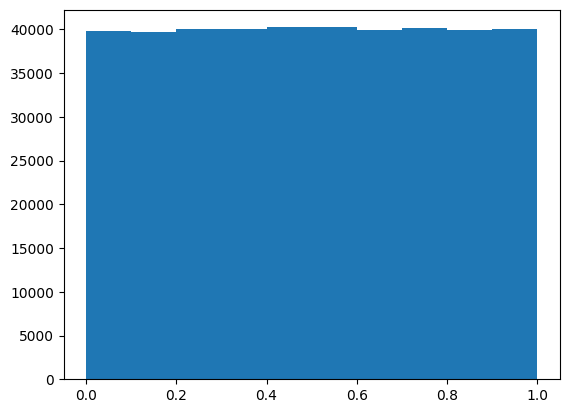

In [84]:
import numpy as np
import matplotlib.pyplot as plt
samples = np.random.rand(400000)
hist, bins = np.histogram(samples)
print(hist)
plt.hist(samples,bins = bins)

In [89]:
data_augmented = 3!=2

In [88]:
if torch.all(label[2,3:5] == label[2,3:5]):
    print('hola')

hola


In [83]:
for n in label:
    print(n.max())


tensor(1.)
tensor(1.)
tensor(1.)
tensor(0.5454)
tensor(0.7658)
tensor(0.7840)
tensor(0.9977)
tensor(1.)


In [73]:
_, pred_indices= label.topk(k=2,dim=1)
_, indices = label.topk(k=2,dim=1)
correct = ((pred_indices[:] == indices[:]))
correct

tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])

In [78]:
label.topk(k=2,dim=1)


torch.return_types.topk(
values=tensor([[1.0000, 0.0000],
        [1.0000, 0.0000],
        [1.0000, 0.0000],
        [0.5454, 0.4546],
        [0.7658, 0.2342],
        [0.7840, 0.2160],
        [0.9977, 0.0023],
        [1.0000, 0.0000]]),
indices=tensor([[ 1,  0],
        [ 4,  1],
        [ 2,  1],
        [ 2, 11],
        [ 0,  3],
        [ 5,  0],
        [11,  9],
        [ 2,  1]]))

In [56]:
import torch
import time


# Usando numel()
start_time = time.time()
num_elements = label.shape[0]
elapsed_time_numel = time.time() - start_time

# Usando len()
start_time = time.time()
length = len(label)
elapsed_time_len = time.time() - start_time

print("Número de elementos:", num_elements)
print("Tiempo usando numel():", elapsed_time_numel)
print("Longitud:", length)
print("Tiempo usando len():", elapsed_time_len)

Número de elementos: 8
Tiempo usando numel(): 3.981590270996094e-05
Longitud: 8
Tiempo usando len(): 3.695487976074219e-05


In [28]:
len(data_new)

1157

In [80]:
import torch
size = data[0][0].shape
GMM_mask(size,rat=0.3).shape

torch.Size([16, 2, 128, 128])

In [3]:
l = data_augmented[0]

In [16]:
np.unique(data[0][0])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.],
      dtype=float32)

In [12]:
print(l[0].max())

50.0


In [29]:
data[0][0].shape

(16, 2, 128, 128)

In [128]:
split_by = 'exp_decay'
print(split_by in ('exp_decay','number','time'))

True


In [5]:
from spikingjelly.datasets import play_frame
import os
root_gifs = os.path.join(os.getcwd(),'gifs_DailyActions_label0_timedecay_tau0_4')
os.mkdir(root_gifs)

k = 0
for file in data:
    if file[1] == 0:
        play_frame(file[0],save_gif_to=os.path.join(root_gifs,f'data_{k}.gif'))
        k += 1
    if k==29:
        break

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_0.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_1.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_2.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_3.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_4.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_5.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActions_label0_timedecay_tau0_4/data_6.gif].
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/gifs_DailyActio

## DVSAnimals dataset

In [2]:
data_dvsgesture = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
Laboratory.execute_experiment(inp_data=data_dvsgesture)

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.


wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  1176
Instancias de test:  288
Mkdir /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1.
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/DVS_Gesture_dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0909, train_acc = 0.0825, test_loss = 0.0909, test_acc = 0.0833, max_test_acc = 0.0833
train speed = 3.8811 images/s, test speed = 7.8287 images/s
escape time = 2023-06-30 23:45:02



In [2]:
data_animals = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset'
Laboratory.execute_experiment(inp_data=data_animals)

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/frames_number_16_split_by_number] already exists.
Posible labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: marcosesgonz (tfm_datcom). Use `wandb login --relogin` to force relogin


Abortar escribiendo exit


Instancias de train:  896
Instancias de test:  225
/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 0, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.4798 images/s, test speed = 5.8741 images/s
escape time = 2023-06-30 22:55:10

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 1, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5608 images/s, test speed = 6.0359 images/s
escape time = 2023-06-30 22:51:44

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/result_logs/SLAnimals_Dataset/T16_b8_lr0.1
epoch = 2, train_loss = 0.0526, train_acc = 0.0525, test_loss = 0.0526, test_acc = 0.0533, max_test_acc = 0.0533
train speed = 3.5916 images/s, test speed = 6.0760 images/s
escape time = 2023-06-30 22:50:33

/Use

test_acc,▁▁▁▁▁
test_loss,▁▁▁▁▁
train_acc,▁▁▁▁▁
train_loss,▁▁▁▁▁
test_acc,0.05333
test_loss,0.05263
train_acc,0.05246
train_loss,0.05263


KeyboardInterrupt: 

In [1]:
from spikingjelly.activation_based.model import parametric_lif_net
from spikingjelly.activation_based import functional, surrogate, neuron
import torch

DVS_net = parametric_lif_net.DVSGestureNet(channels=128, spiking_neuron=neuron.LIFNode, surrogate_function=surrogate.ATan(), detach_reset=True)
functional.set_step_mode(DVS_net, 'm')

x = torch.rand(size=[10, 8, 2, 128, 128])
print(DVS_net(x).shape)

torch.Size([10, 8, 22])


## Cargando pesos de red entrenada y abortada en la época 40:

In [ ]:
import torch
w_root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/result_logs/DVS_ActionRecog_dataset/T16_b1_lr0.1/checkpoint_latest.pth'
run_wandb_path = 'tfm_datcom/Experimento1/v8ng5wwx'
k = torch.load(w_root)
k.keys()

dict_keys(['net', 'optimizer', 'lr_scheduler', 'epoch', 'max_test_acc'])

In [ ]:
k['lr_scheduler']

{'T_max': 50,
 'eta_min': 0,
 'base_lrs': [0.1],
 'last_epoch': 46,
 'verbose': False,
 '_step_count': 47,
 '_get_lr_called_within_step': False,
 '_last_lr': [0.0015708419435684518]}